<a href="https://colab.research.google.com/github/Zamoca42/TIL/blob/main/AI/keras_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# CNN + load model 후 테스트만
# keras에서 제공하는 데이터
(X_train, Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, strides=(1,1), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=3, strides=(2,2), padding='same', activation='tanh', input_shape=[28*28]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(), # **2D 데이터를 1D 데이터로 변환
    keras.layers.Dense(units=10, activation='softmax'),
])

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# to_categorical -> categorical_crossentropy
# model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) # one-hot encoding

hist = model.fit(X_train, Y_train, batch_size=128, epochs=3, validation_split=0.2, shuffle=True, verbose = 1)

Epoch 1/3
375/375 [==============================] - 28s 74ms/step - loss: 0.4984 - accuracy: 0.8678 - val_loss: 0.1524 - val_accuracy: 0.9564
Epoch 2/3
375/375 [==============================] - 29s 78ms/step - loss: 0.1276 - accuracy: 0.9623 - val_loss: 0.1013 - val_accuracy: 0.9715
Epoch 3/3
375/375 [==============================] - 27s 73ms/step - loss: 0.0903 - accuracy: 0.9732 - val_loss: 0.0836 - val_accuracy: 0.9756


test loss: 0.13453175127506256
test accuracy: 0.9596999883651733
n: 4572
1/1 [==============================] - 0s 85ms/step
predict:  [8]
True_value : 6


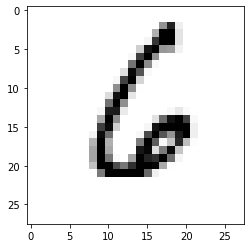

n: 5532
1/1 [==============================] - 0s 23ms/step
predict:  [7]
True_value : 9


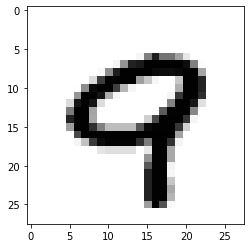

n: 3186
1/1 [==============================] - 0s 29ms/step
predict:  [8]
True_value : 9


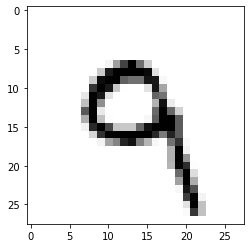

n: 3881
1/1 [==============================] - 0s 30ms/step
predict:  [9]
True_value : 0


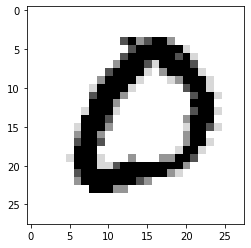

n: 5987
1/1 [==============================] - 0s 26ms/step
predict:  [0]
True_value : 3


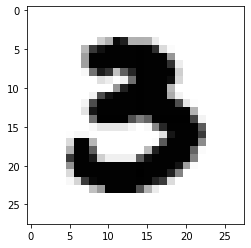

n: 7707
1/1 [==============================] - 0s 28ms/step
predict:  [9]
True_value : 0


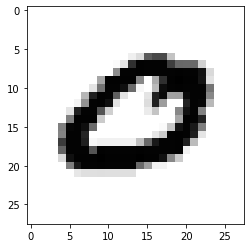

n: 6290
1/1 [==============================] - 0s 25ms/step
predict:  [3]
True_value : 5


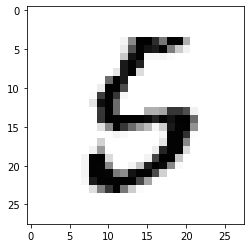

n: 1979
1/1 [==============================] - 0s 27ms/step
predict:  [9]
True_value : 4


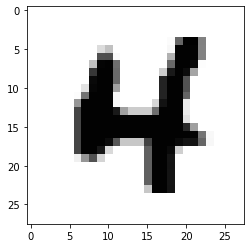

n: 4193
1/1 [==============================] - 0s 29ms/step
predict:  [6]
True_value : 1


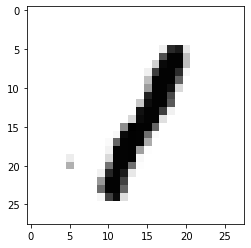

n: 5223
1/1 [==============================] - 0s 23ms/step
predict:  [5]
True_value : 7


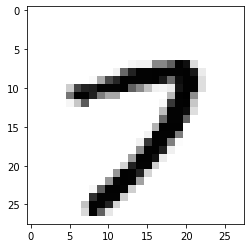

In [7]:
# 평가
score = model.evaluate(X_test,Y_test, verbose=0)
print("test loss:", score[0])
print("test accuracy:", score[1])

# prediction과 맞는지 비교

for i in range(10):
  n = int(np.random.rand()*10000)
  print("n:", n)
  print("predict: ", np.argmax(model.predict(X_test[n].reshape(1,28,28,1)),axis=1))
  print("True_value :", Y_train[n])

  plt.imshow(X_train[n].reshape(28,28), cmap='Greys', interpolation='nearest')
  plt.show()

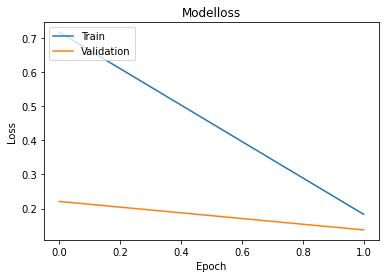

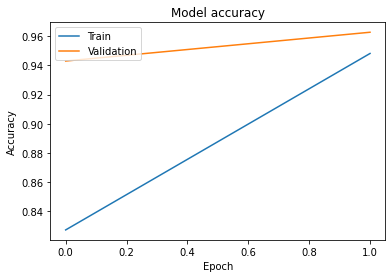

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Modelloss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:
from keras.models import load_model

# 학습이 끝난 뒤 모델 저장
model.save('/content/drive/MyDrive/mnist_conv_e3.h5')

# 저장 된 모델 불러오기
model = keras.models.load_model('/content/drive/MyDrive/mnist_conv_e3.h5')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 576)               0         
                                                                 
 dense_4 (Dense)             (None, 10)               